In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator
from z3 import *
import time
from qiskit import *

In [3]:
circ0 = QuantumCircuit().from_qasm_file('benchmark/qft_4.qasm')

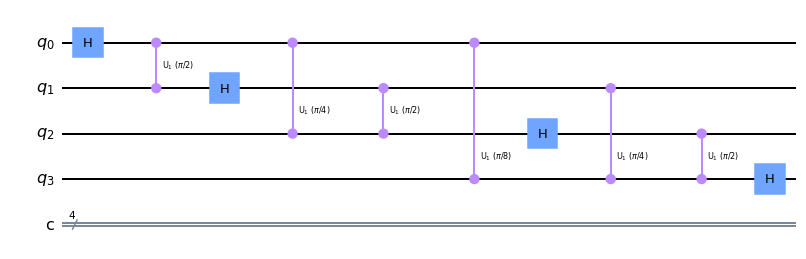

In [4]:
circ0.draw("mpl")

In [5]:
from qiskit import Aer

backend = Aer.get_backend('unitary_simulator')
cvbe0_time_1 = time.time()
job = backend.run(circ0)
result = job.result()
cvbe0_time_2 = time.time()
print("C1 construction: %.6f"%(cvbe0_time_2-cvbe0_time_1))
print(result.get_unitary(circ0, decimals=3))

C1 construction: 0.004000
Operator([[ 0.25 +0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,
            0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,
            0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,
            0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ,  0.25 -0.j   ],
          [ 0.25 +0.j   , -0.25 +0.j   ,  0.   +0.25j , -0.   -0.25j ,
            0.177+0.177j, -0.177-0.177j, -0.177+0.177j,  0.177-0.177j,
            0.231+0.096j, -0.231-0.096j, -0.096+0.231j,  0.096-0.231j,
            0.096+0.231j, -0.096-0.231j, -0.231+0.096j,  0.231-0.096j],
          [ 0.25 +0.j   ,  0.25 -0.j   , -0.25 +0.j   , -0.25 +0.j   ,
            0.   +0.25j ,  0.   +0.25j , -0.   -0.25j , -0.   -0.25j ,
            0.177+0.177j,  0.177+0.177j, -0.177-0.177j, -0.177-0.177j,
           -0.177+0.177j, -0.177+0.177j,  0.177-0.177j,  0.177-0.177j],
          [ 0.25 +0.j   , -0.25 +0.j   , -0.   -0.25j ,  0.   +0.25j ,
           -0.177+0.177j,  0.177-0.177j,  0.177+

In [6]:
data = result.get_unitary(circ0, decimals=3).data

In [8]:
lst = []
for i in range(len(data)):
    for j in range(len(data[0])):
        if data[i][j] not in lst:
            lst.append(data[i][j])
print(lst)
print(len(lst))

[(0.25+0j), (-0.25+0j), 0.25j, (-0-0.25j), (0.177+0.177j), (-0.177-0.177j), (-0.177+0.177j), (0.177-0.177j), (0.231+0.096j), (-0.231-0.096j), (-0.096+0.231j), (0.096-0.231j), (0.096+0.231j), (-0.096-0.231j), (-0.231+0.096j), (0.231-0.096j)]
16


In [3]:
from jellyfish import soundex

In [5]:
soundex('gooogle')

'G240'

In [2]:
from dd import _bdd

In [14]:
bdd = _bdd.BDD()
bdd.configure(reordering=True)
bdd.declare('a', 'b', 'c', 'd', 'e', 'f')
u = bdd.add_expr(r'a /\ b \/ c /\ d')
v = bdd.add_expr(r'a /\ d \/ b /\ c')
v_ = bdd.let({'c':'e', 'd':'f', 'a':'c', 'b':'d'}, v)
# v_ = bdd.let({'a':'c', 'b':'d'}, v_)
t = bdd.add_expr(r'c /\ f \/ d /\ e')
t == v_

True

In [9]:
u_ = bdd.let({'b':'c'}, u)
w = u_ & v
w == bdd.false

True

In [11]:
bdd.to_expr(u_)

'ite(a, c, FALSE)'